<a href="https://colab.research.google.com/github/BrandonLCC/Informe_Tecnico_FMY0100/blob/rama-modelos/Modelo_2_Regresi%C3%B3n_Lineal_M%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importaciones y Dataset**

In [1]:
#Las importaciones necesarias
import numpy as np
import pandas as pd # Estructura y manipulación de datos
import matplotlib.pyplot as plt # Graficos
from matplotlib import style # Si va
import seaborn as sns # diseño de Graficos

#---- Importaciónes de scikit learn ----

from sklearn.preprocessing import MinMaxScaler  # Con esta importacion, podemos normalizar los datos, para que la escala de los datos sean entre 0 y 1
from sklearn.preprocessing import LabelEncoder # Para transformar datos categoricos a formato numerico

from sklearn.linear_model import LinearRegression # con esta libreria podemos saber sobre problemas de clasificacion, regresion  y clustering () modelo lineal etc
from sklearn.model_selection import train_test_split

#---- Metricas de modelos de regresión ----

from sklearn.metrics import r2_score # solo lo ocuparemos para problemas de regresion o todo lo que sea numerico
from sklearn.metrics import mean_squared_error #solo para la parte numerica, con esto vamos a poder sumar y sacar el promedio del los datos o el error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    name = fn

df = pd.read_csv(name, sep=";")

Saving Anexo ET_demo_round_traces_2022 (1).csv to Anexo ET_demo_round_traces_2022 (1).csv


<ipython-input-2-b92e9cb142f9>:7: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";")


## **2.Preparacion de los datos**

## Respaldo del dataframe

In [3]:
# Crear una variable como respaldo para poder arreglar el data set para poder utilizar despues para modelar
df_backup = df.copy()

## Limpieza de datos

In [4]:
df_backup.drop(columns=['Unnamed: 0'], inplace=True)
# esta colmuna se elimnara ya que solamente contiene datos false lo que indica que ningun jugador ha presentado fallas en las partidas
df_backup.drop(columns=['AbnormalMatch'], inplace=True)
#esta colmuna FirstKillTime la eliminaremos ya que nos sirve para la hipotesis o preguntas
df_backup.drop(columns=['FirstKillTime'], inplace=True)
#Eliminad tiemplive y TravelledDistance podria no ser relevante para el analisis o hipotesis
df_backup.drop(columns=['TimeAlive'], inplace=True)
df_backup.drop(columns=['TravelledDistance'], inplace=True)

In [5]:
# Como hay pocos nulos, eliminamos esas filas
df_backup.dropna(inplace=True)
# Verificar cantidad de nulos
print(df_backup.isnull().sum())

Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int64


### Eliminación de datos atipicos

In [6]:
# Eliminando datos atipicos mayores a 28 de la culumna Asesinatos en la partida
df_backup.drop(df_backup[df_backup['MatchKills'] > 28].index, inplace=True)
df_backup.shape

(78992, 25)

In [7]:
# Eliminando datos atipicos mayores a 8 de la culumna asistencias en la partida
df_backup.drop(df_backup[df_backup['MatchAssists'] > 8].index, inplace=True)
df_backup.shape

(78707, 25)

# **Trasformacion de datos**

trataremos de trasformar y arreglar variables que no son numericos, cambiar formatos  para poder utilizar despues, para preparar el modelado utilizando scaler

* **Ver Valores Únicos en la Columna ""Team" y "Mapa"**

In [8]:
df_backup.Team.unique()

array(['Terrorist', 'CounterTerrorist'], dtype=object)

## Uso de la técnica - label encoding
El label encoding nos ayudara a transformar los
datos categóricos **Team** y **Map** en un formato numérico como beneficio a posibles modelos de machine learning.

In [9]:
label_encoder = LabelEncoder()
df_backup['Team'] = label_encoder.fit_transform(df_backup['Team'])
df_backup['Map'] = label_encoder.fit_transform(df_backup['Map'])

In [10]:
df_backup['Map'].unique()

array([1, 3, 2, 0])

## Transformación de los datos Booleanos

In [ ]:
df_backup.RoundWinner = df_backup.RoundWinner.astype(bool)
df_backup.MatchWinner = df_backup.MatchWinner.astype(bool)
# convertir numeros
df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
df_backup.MatchWinner.replace({True: 1, False: 0}, inplace=True)
df_backup.Survived.replace({True: 1, False: 0}, inplace=True)

In [12]:
df_backup.RoundHeadshots.unique()

array([0, 1, 2, 3, 4, 5])

- Se realiza una transformacion en los datos que contenga valores de tipo **TRUE** o **FALSE** a valores **numericos** con el proposito de realizar modelos que requieran de estos tipos de datos. Ademas, con esto, ayudara o benecifiar el procesamiento de los datos optimizando la velocidad y eficientiza.

In [13]:
# Revisar estructura y tipos
df_backup.info()
# Vista previa de los primeros datos limpios
df_backup.head()

<class 'pandas.core.frame.DataFrame'>
Index: 78707 entries, 0 to 79156
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          78707 non-null  int64  
 1   Team                         78707 non-null  int64  
 2   InternalTeamId               78707 non-null  int64  
 3   MatchId                      78707 non-null  int64  
 4   RoundId                      78707 non-null  int64  
 5   RoundWinner                  78707 non-null  int64  
 6   MatchWinner                  78707 non-null  int64  
 7   Survived                     78707 non-null  int64  
 8   RLethalGrenadesThrown        78707 non-null  int64  
 9   RNonLethalGrenadesThrown     78707 non-null  int64  
 10  PrimaryAssaultRifle          78707 non-null  float64
 11  PrimarySniperRifle           78707 non-null  float64
 12  PrimaryHeavy                 78707 non-null  float64
 13  PrimarySMG           

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,RLethalGrenadesThrown,RNonLethalGrenadesThrown,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,1,1,1,4,1,1,1,0,0,4,...,0,0,0,0,750,4400,0,0,0,0
1,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,800,4400,0,0,0,0
2,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,1000,4400,0,0,0,0
3,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,850,4400,0,0,0,0
4,1,1,1,4,1,1,1,1,1,1,...,0,0,0,0,1000,4400,0,0,0,0



- limitar las rondas que sean mayores 30 rondas

In [14]:
#  ajustar rondas que sean mayor a 30
df_backup = df_backup[(df_backup['RoundId'] >= 1) & (df_backup['RoundId'] <= 30)]

df_backup['RoundId'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

# **3.Modelo de Regresion Multiple**

In [23]:
# prompt: definir variables para modelo de regresion multiple

x = df_backup[['MatchKills','MatchAssists']]
y = df_backup['RoundId']

In [24]:
y

,RoundId
0,1
1,1
2,1
3,1
4,1
...,...
79152,5
79153,5
79154,5
79155,5


In [25]:
x

,MatchKills,MatchAssists
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
79152,4,2
79153,8,1
79154,5,2
79155,1,1


In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x, y)

Y_hat = model.predict(x)

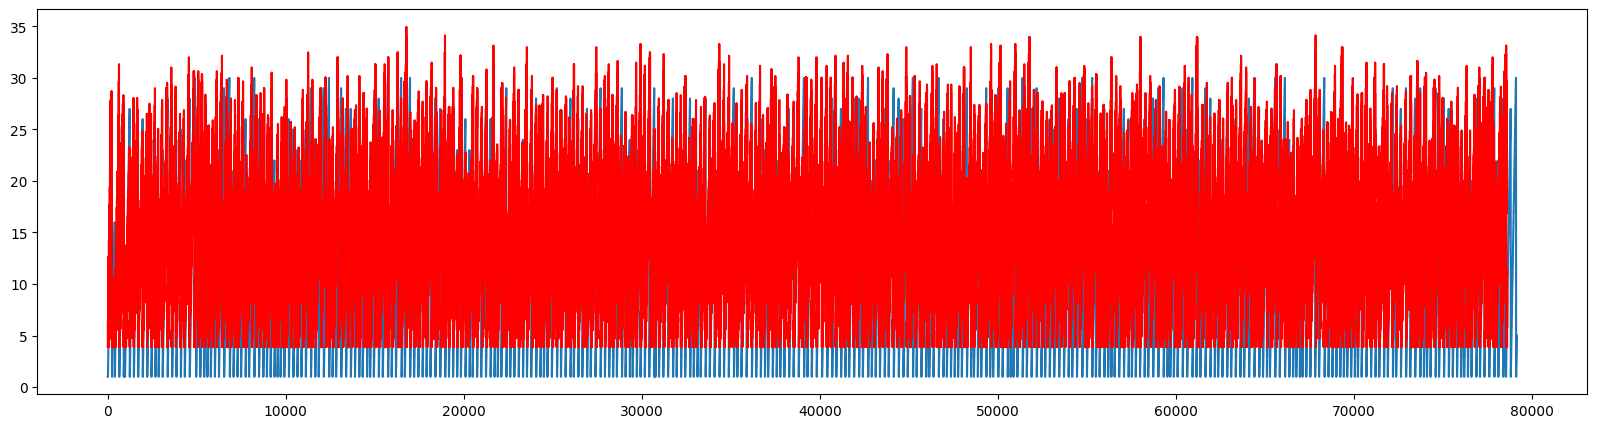

In [27]:
plt.subplots(figsize=(20,5))
plt.plot(y)
plt.plot(Y_hat, 'r')

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.2 )

In [29]:
model = LinearRegression()
model.fit(Xtrain, Ytrain)


LinearRegression()

In [30]:
Y_hat = model.predict(Xtest)


print("Mean squared error",mean_squared_error(Ytest, Y_hat))
print("mean_absolute_error",mean_absolute_error(Ytest, Y_hat))
rmse = np.sqrt(mean_squared_error(Ytest, Y_hat))

print("Root Mean Squared Error:",rmse )
print('Variance score: %.2f',r2_score(Ytest, Y_hat))



Mean squared error 16.84918563669261
mean_absolute_error 3.2924829264692126
Root Mean Squared Error: 4.104775954506239
Variance score: %.2f 0.6893830727753901


Mejores parámetros encontrados por GridSearchCV:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mejor puntuación (Negativo del MSE) encontrada por GridSearchCV:
-15.314362396383597

Evaluación del mejor modelo de árbol de regresión en el conjunto de prueba:
Mean squared error: 15.482512047917414
Mean absolute error: 3.115869179624588
Root Mean Squared Error: 3.9347823380610794
Variance score (R^2): 0.7145778780210466


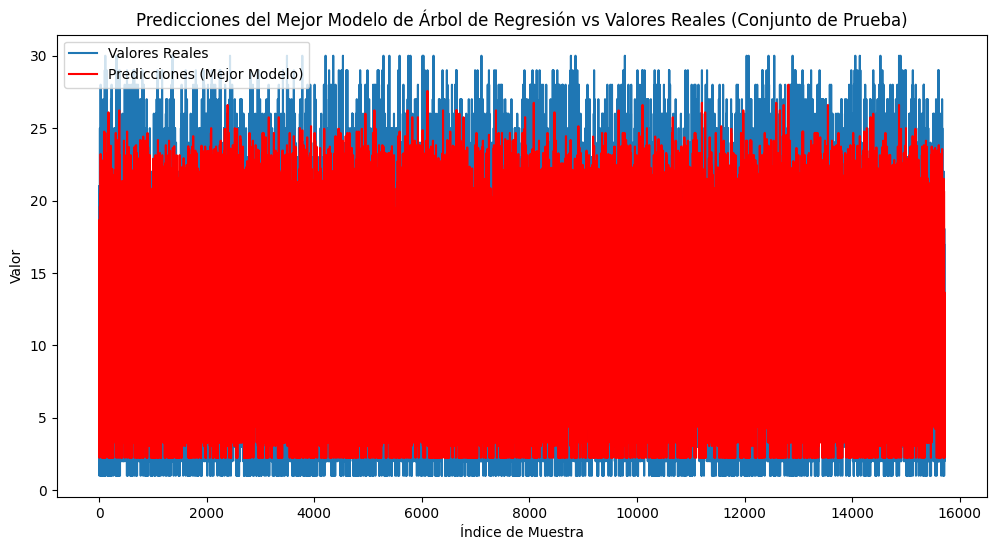

In [32]:
# prompt:  puedes generar un gridseach cv validation para regresion multiple usando arboles



# Definir el modelo de árbol de regresión
tree = DecisionTreeRegressor(random_state=42)

# Definir los parámetros a ajustar en el GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar el GridSearchCV
# cv=5 indica 5-fold cross-validation
# scoring='neg_mean_squared_error' se usa para regresión (GridSearchCV maximiza el scoring,
# por eso usamos el negativo del MSE)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Ajustar el GridSearchCV a los datos de entrenamiento
# Asegúrate de usar tus datos de entrenamiento (Xtrain, Ytrain)
grid_search.fit(Xtrain, Ytrain)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados por GridSearchCV:")
print(grid_search.best_params_)

# Mostrar la mejor puntuación (el MSE negativo más alto, que corresponde al MSE más bajo)
print("Mejor puntuación (Negativo del MSE) encontrada por GridSearchCV:")
print(grid_search.best_score_)

# Obtener el mejor modelo entrenado
best_tree_model = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
Y_hat_best = best_tree_model.predict(Xtest)

print("\nEvaluación del mejor modelo de árbol de regresión en el conjunto de prueba:")
print("Mean squared error:", mean_squared_error(Ytest, Y_hat_best))
print("Mean absolute error:", mean_absolute_error(Ytest, Y_hat_best))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(Ytest, Y_hat_best)))
print('Variance score (R^2):', r2_score(Ytest, Y_hat_best))

# Opcional: Visualizar los resultados del mejor modelo en el conjunto de prueba
plt.figure(figsize=(12, 6))
plt.plot(Ytest.values, label='Valores Reales') # Usar .values si Ytest es una Serie de Pandas
plt.plot(Y_hat_best, 'r', label='Predicciones (Mejor Modelo)')
plt.title('Predicciones del Mejor Modelo de Árbol de Regresión vs Valores Reales (Conjunto de Prueba)')
plt.xlabel('Índice de Muestra')
plt.ylabel('Valor')
plt.legend()
plt.show()


# **Resultado del Modelo:**

uso de variable:



Mean squared error 16.84918563669261

mean_absolute_error 3.2924829264692126

Root Mean Squared Error: 4.104775954506239

r-cuadrado (R^2): %.2f 0.6893830727753901

Observacion:
* El modelo  se podria ser casi bueno  pero moderado ya que R-squared (R2) es de (0.68)  se consideraria aceptable o moderada pero se encuentra muy bajo en la varianza y el apartado de erroes  como mean square error  los errores serian  (16.8) en los datos reales,  mean absolute error Se equivoca en promedio (3.29) y en ROOT Mean se square error la predicion promedio se desvia un (4.10)






# **Resultado del GridseahCV**


Mean squared error: 15.482512047917414

Mean absolute error: 3.115869179624588

Root Mean Squared Error: 3.9347823380610794

Variance score (R^2): 0.7145778780210466

observacion:

* Esto indica que las predicciones del modelo con GridseahCV el  r-cuadrado (R^2) mejoro un poco que seria (0.7) se podria decir que esta  moderado y un poco aceptable.


-

* El MSE bajó a 15.48, y el MAE disminuyó levemente a 3.11, lo que indica que el modelo comete errores más pequeños en promedio.

* El RMSE también bajó a 3.93, lo cual indica una desviación promedio ligeramente menor en las predicciones respecto a los valores reales.



